In [1]:
# Install catalax
# !pip install catalax

In [ ]:
import diffrax
import catalax as ctx
import catalax.neural as ctn
import catalax.mcmc as cmc

import tqdm

# Prevent ipywidgets from being used
tqdm.tqdm = tqdm.std.tqdm

# Set the number of workers used for parallelizations
ctx.set_host_count(10)

In [3]:
# Load model
model = ctx.Model.load("./models/menten_model_w_priors.json")

# Load dataset
dataset = ctx.Dataset.from_croissant(path="./datasets/croissant_dataset.zip")

# Load neural ODE
neuralode = ctn.NeuralODE.from_eqx("./trained/menten_trained.eqx")

In [4]:
# # First, lets repeat the analysis of HMC.ipynb
hmc = cmc.HMC(
    num_warmup=1000,
    num_samples=1000,
    dt0=1.0,
    max_steps=64**4,
    # We are using Euler and a wide step size here, since Tsit5
    # is too slow. In a real scenario, you should stick to an embedded
    # solver or even implicit methods, but this is just an example
    solver=diffrax.Euler,
)

# Run the HMC
result = hmc.run(
    model=model,
    dataset=dataset,
    yerrs=8.0,
)


🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [01:10<00:00, 28.44it/s, 7 steps of size 8.50e-03. acc. prob=0.94] 


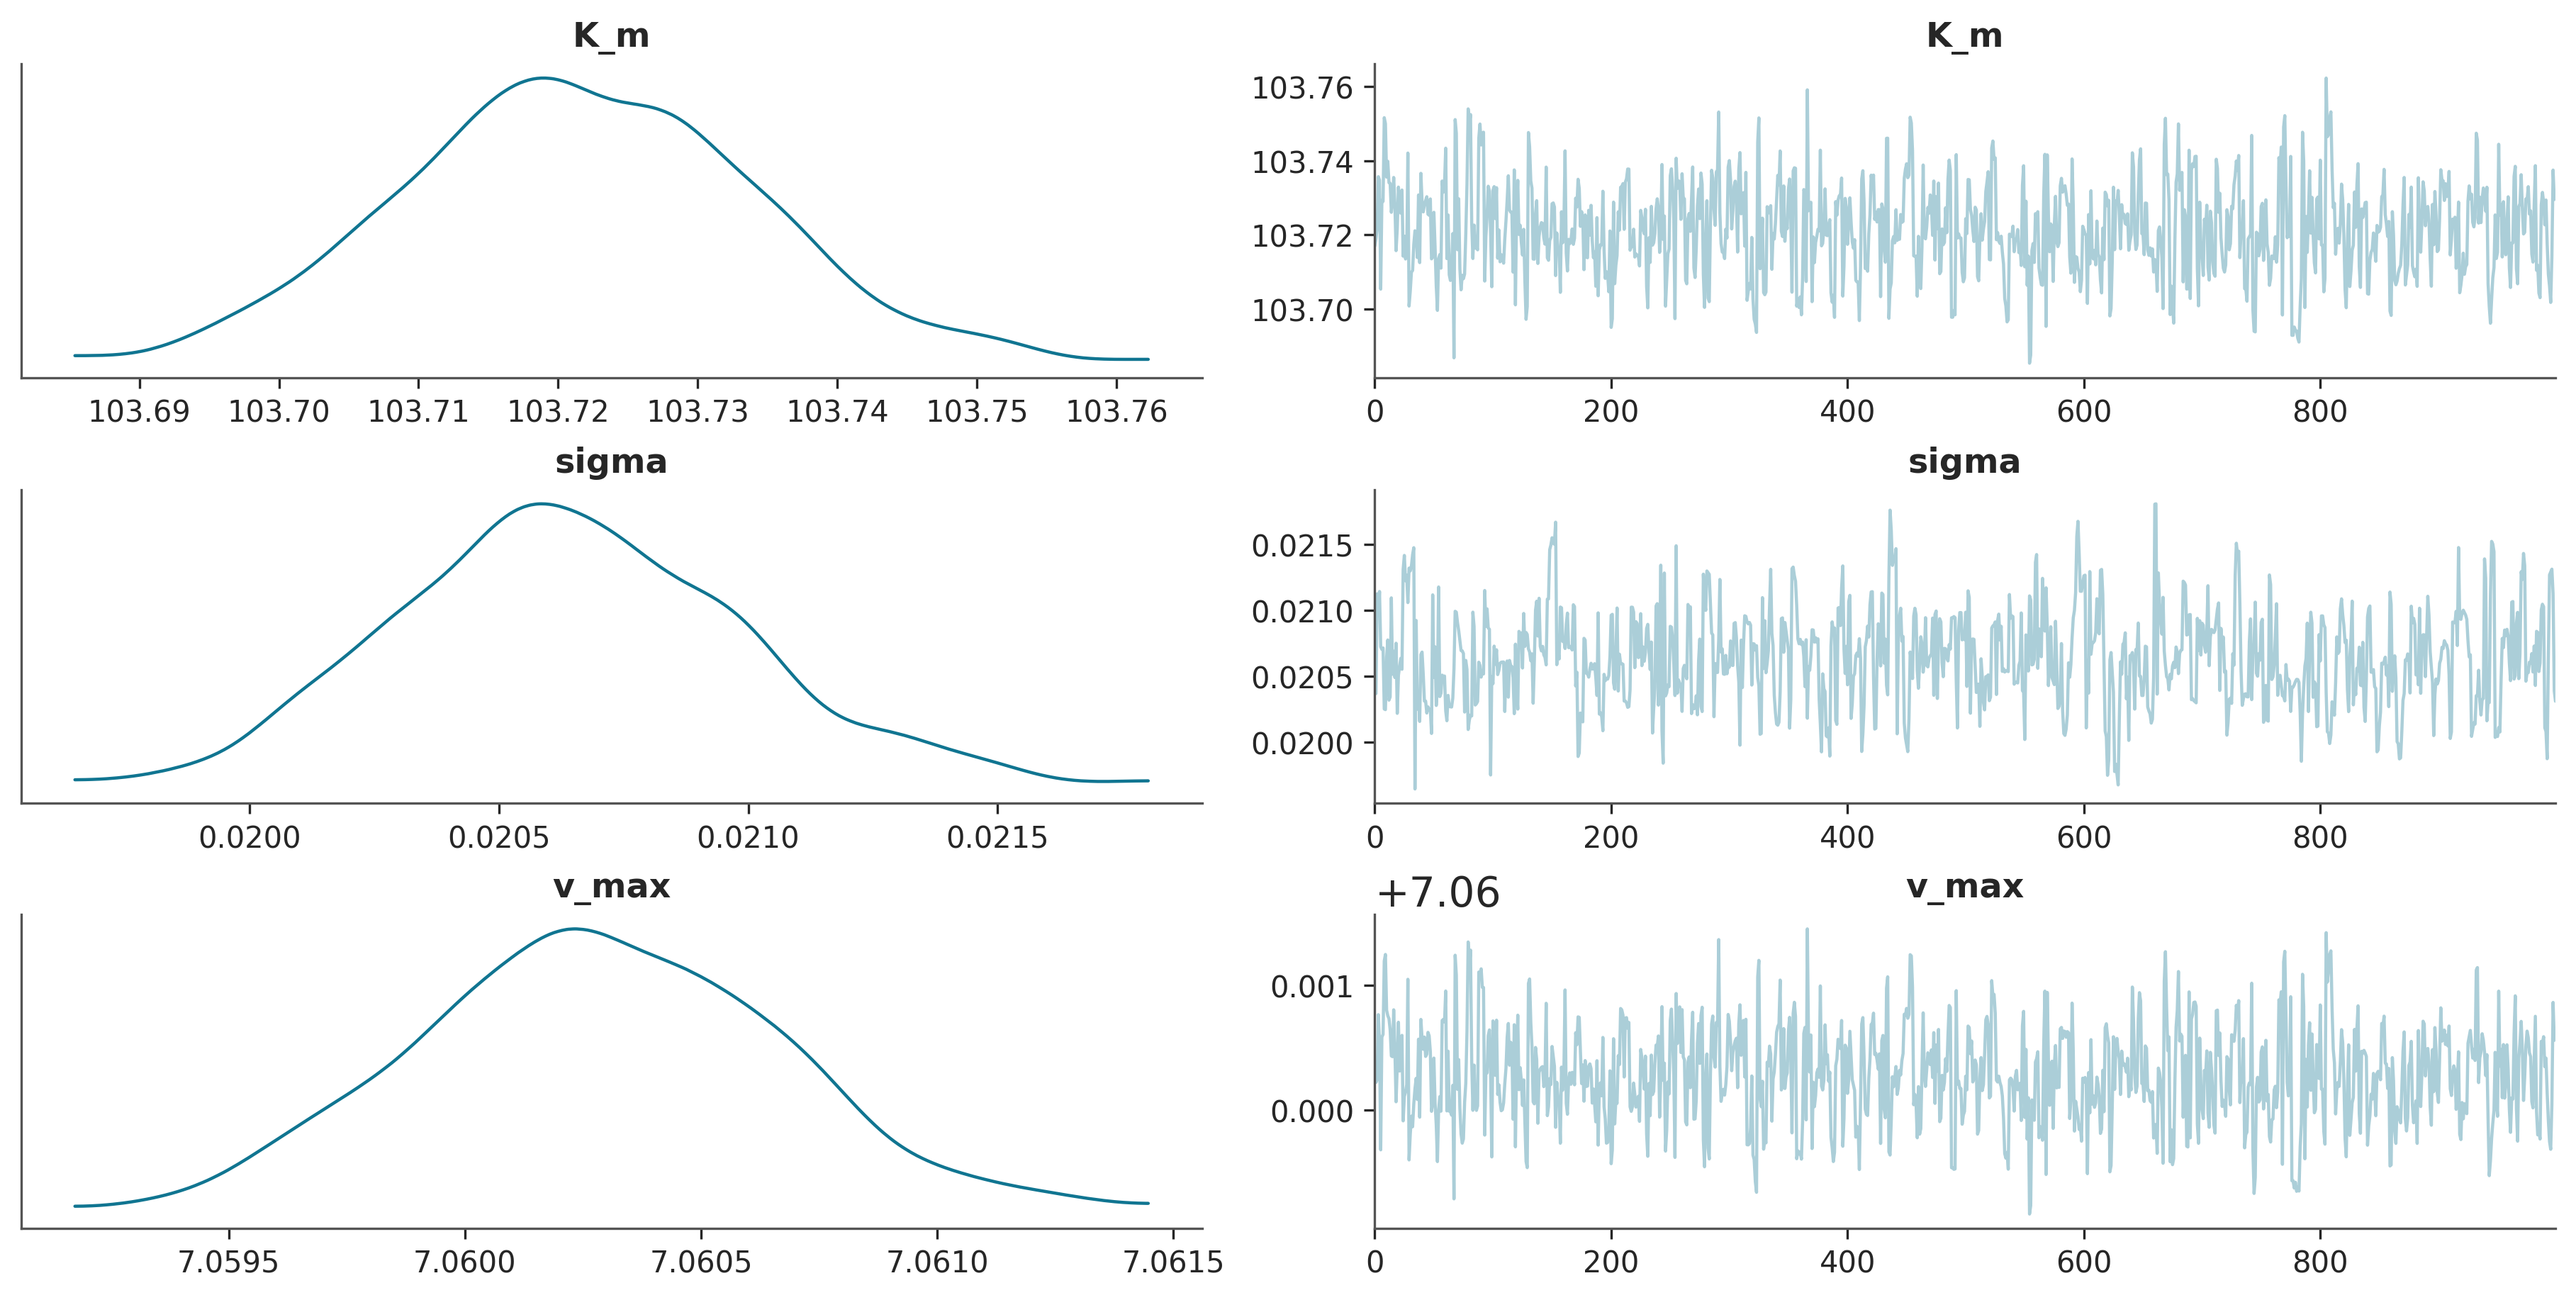

In [5]:
# Plot the posterior distributions
result.plot_trace(show=True)

In [6]:
# Next, simply pass the neural ODE and the surrogate HMC will be used
result = hmc.run(
    model=model,
    dataset=dataset,
    yerrs=1e-3,  # Adapt to rate-matching error, which can be lower
    surrogate=neuralode,
)

Using surrogate model for rate prediction

🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [00:01<00:00, 1324.16it/s, 7 steps of size 1.54e-01. acc. prob=0.91] 


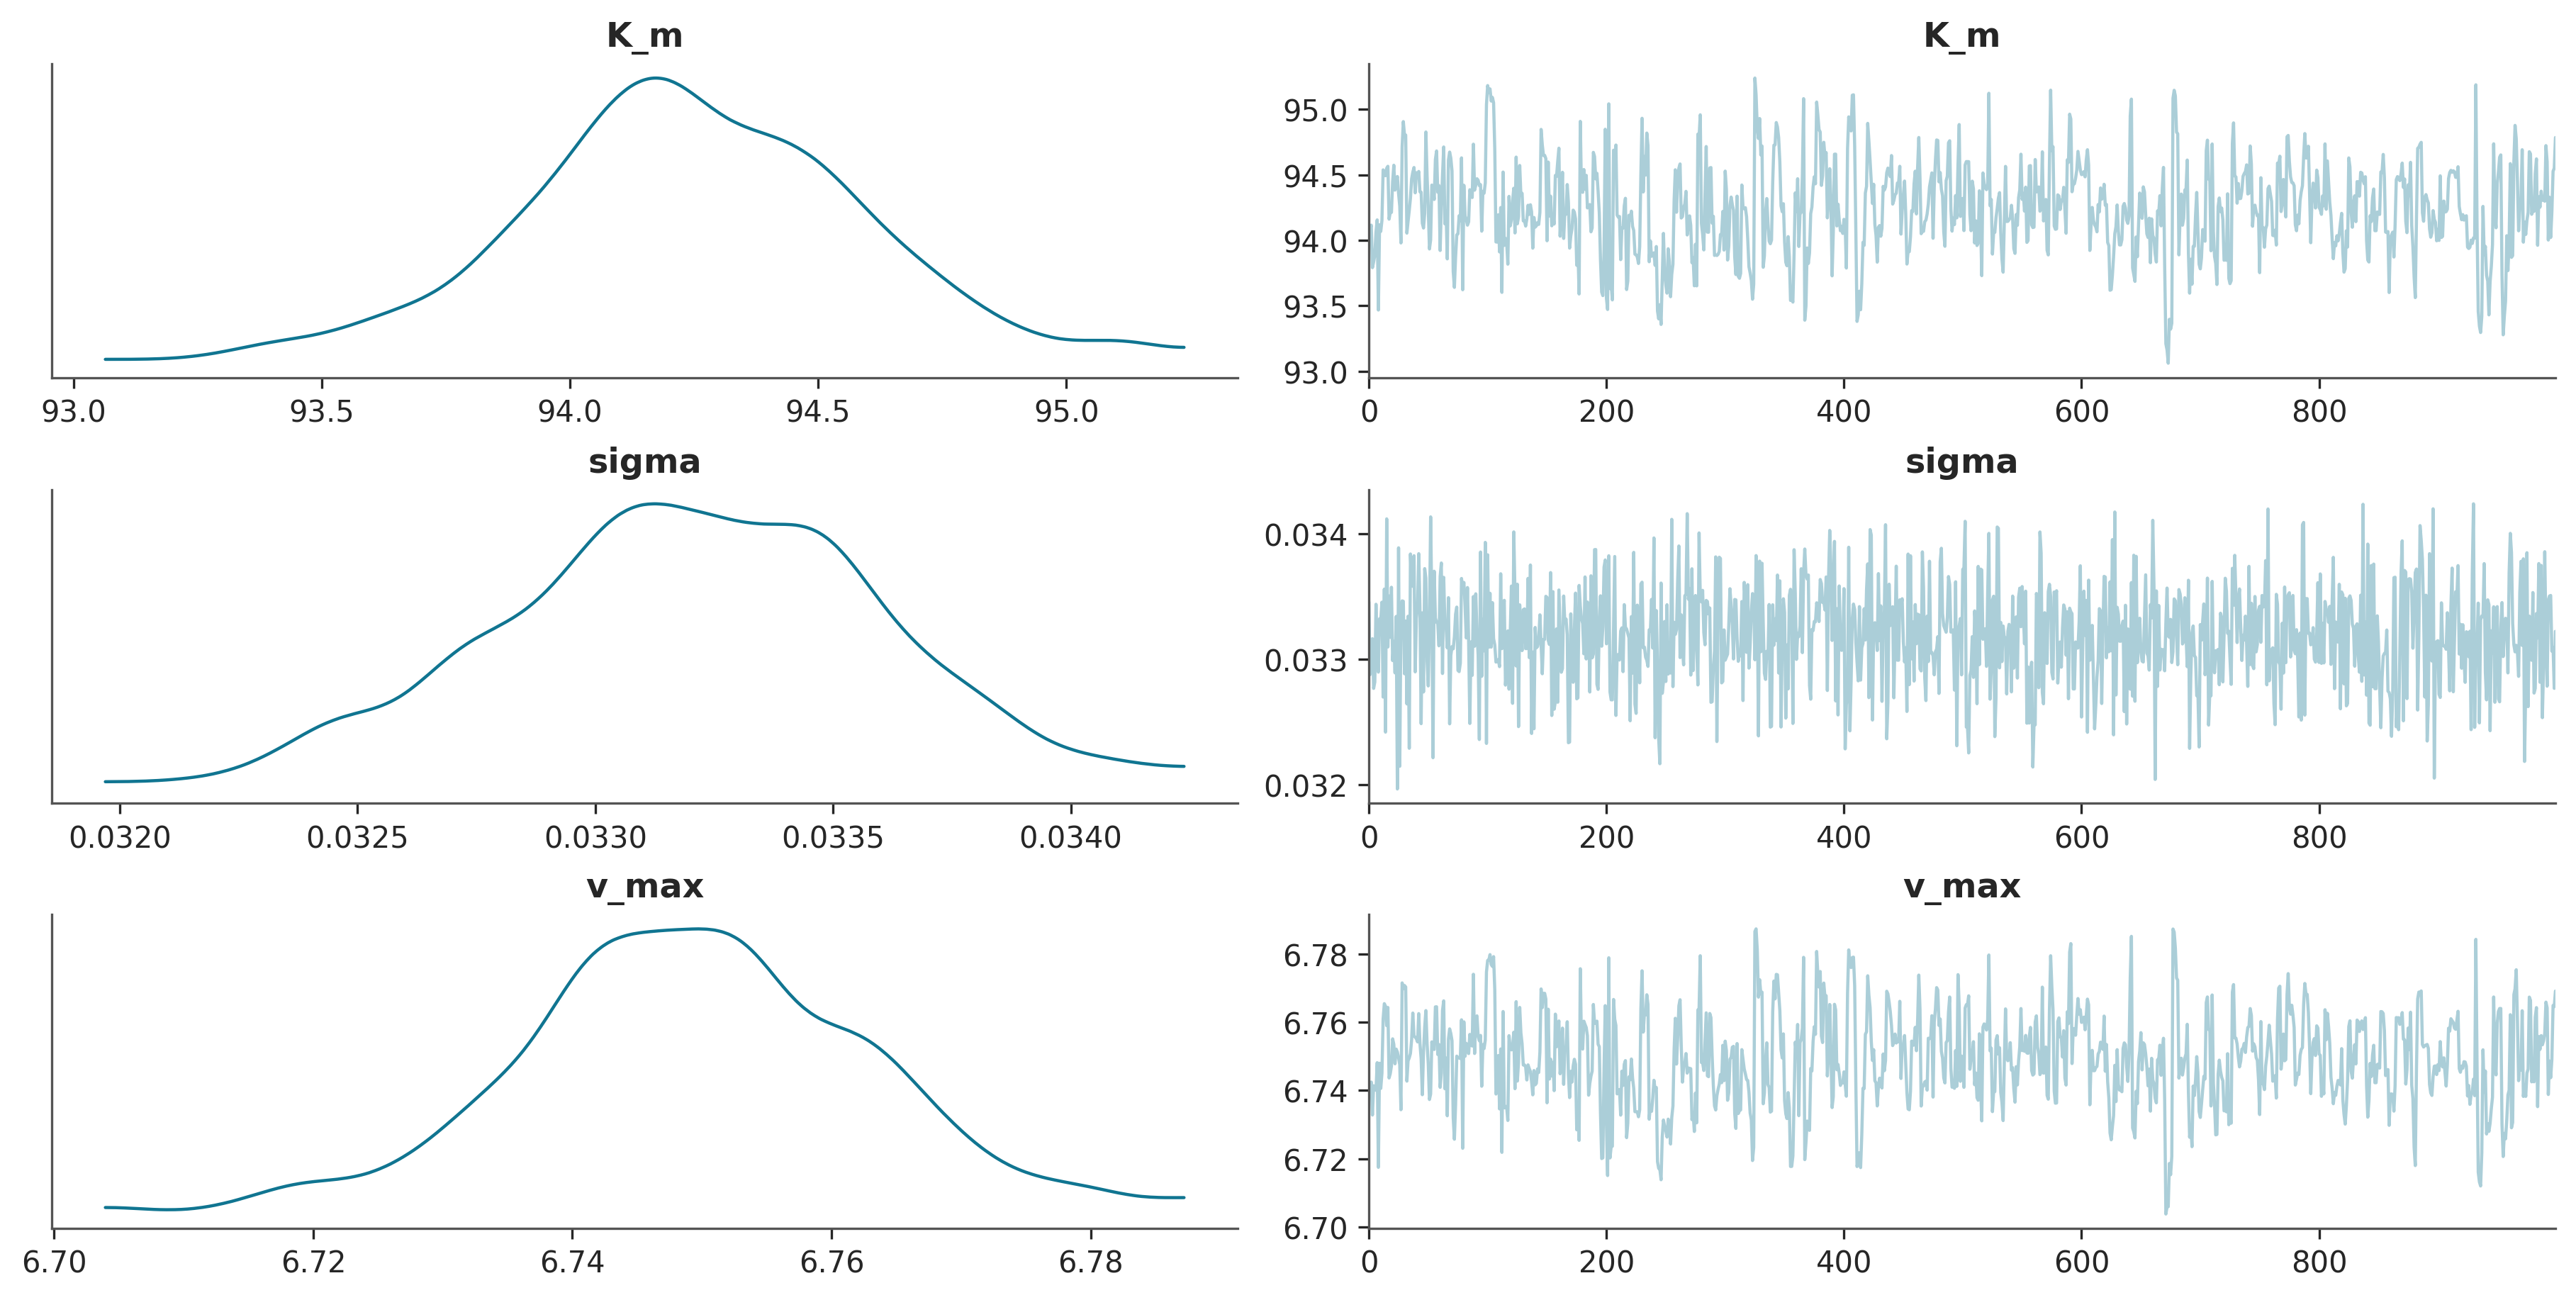

In [7]:
# Plot the posterior distributions
result.plot_trace(show=True)

In [8]:
# Lets scale this up to a bigger amount of samples
# and add more chains on top of that

hmc = cmc.HMC(
    num_warmup=10_000,
    num_samples=100_000,
    chain_method="parallel",
    num_chains=10,
    dt0=0.1,
    max_steps=64**4,
)

result = hmc.run(
    model=model,
    dataset=dataset,
    yerrs=1e-3,
    surrogate=neuralode,
)

Using surrogate model for rate prediction

🚀 Running MCMC



  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]

  0%|          | 0/110000 [00:00<?, ?it/s]